In [1]:

from google.colab import drive, userdata
import os

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Setup Paths (Change to your actual repo name)
REPO_PATH = "/content/drive/MyDrive/ML/DL_With_Pytorch"
%cd {REPO_PATH}

# 3. Secure Auth
token = userdata.get('GH_TOKEN')
username = "barada02"
repo = "DL_With_Pytorch"
!git remote set-url origin https://{token}@github.com/{username}/{repo}.git

# 4. Identity
!git config --global user.email "Chandanbarada2@gmail.com"
!git config --global user.name "Kumar"

!git pull origin main
print("✅ Environment Ready!")


Mounted at /content/drive
/content/drive/MyDrive/ML/DL_With_Pytorch
From https://github.com/barada02/DL_With_Pytorch
 * branch            main       -> FETCH_HEAD
Already up to date.
✅ Environment Ready!


In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Pytorch Fundamentals

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.9.0+cpu


# Tensors
## Creating tensor using ```torch.tensor()```

In [3]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [5]:
scalar.ndim

0

In [7]:
type(scalar)

torch.Tensor

In [6]:
scalar.item() # got as python int

7

#### vector

In [8]:
data = [5,7]
v = torch.tensor(data)
v

tensor([5, 7])

In [14]:
print(type(v))
v.ndim


<class 'torch.Tensor'>


1

In [15]:
v.shape

torch.Size([2])

#### Matrix

In [16]:
m_data = [[6,9],[8,8]]
m = torch.tensor(m_data)
m

tensor([[6, 9],
        [8, 8]])

In [17]:
m.ndim

2

In [18]:
m.shape

torch.Size([2, 2])

In [19]:
m[0]

tensor([6, 9])

#### Tensor

In [28]:
t_data = [[[6,5],[7,2],[15,78]]]

t = torch.tensor(t_data)
t

tensor([[[ 6,  5],
         [ 7,  2],
         [15, 78]]])

In [29]:
t.shape # 3 row 2 coloumns

torch.Size([1, 3, 2])

1 (Dimension 0): The number of matrices (often the Batch Size).

3 (Dimension 1): The number of Rows in each matrix.

2 (Dimension 2): The number of Columns in each matrix.

To get one specific number, you must provide 3 addresses: ```t[block_index, row_index, col_index]```

In [30]:
t.ndim

3

# Initializing a Tensor (different ways)

### Direct from data

In [34]:
data = [[56, 26],[39, 69]]
x_data = torch.tensor(data)
x_data

tensor([[56, 26],
        [39, 69]])

### From numpy array

In [36]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[56, 26],
        [39, 69]])

### From another Tensor

In [37]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0801, 0.6656],
        [0.6625, 0.7791]]) 



### With random or constant values: ZERO and ONEs
shape is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor

In [13]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9316, 0.2501, 0.8811],
        [0.2285, 0.4542, 0.4069]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


**why torch.empty? when we have torch.randn**

When you call torch.randn, PyTorch has to do two things:

1. Allocate a block of memory.

2. Fill that memory by running a mathematical algorithm to generate numbers following a normal distribution.

When you call torch.empty, PyTorch only does step 1. It grabs a block of memory and hands it to you exactly as it is. Whatever was left in that memory by a previous process (the "garbage" data) stays there. This makes empty significantly faster because it skips the "write" phase entirely.

In [36]:
input = torch.empty(2, 3)
print(input)

tensor([[-9.9147e+20,  4.3915e-41,  3.7240e+00],
        [ 0.0000e+00,  4.4842e-44,  0.0000e+00]])


#### torch.arange

In [32]:
one_to_ten = torch.arange(start=1, end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [34]:
ra_tensor = torch.arange(start=0, end=1000, step=77)
ra_tensor

tensor([  0,  77, 154, 231, 308, 385, 462, 539, 616, 693, 770, 847, 924])

### Attributes of a Tensor
Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [46]:
tensor = torch.rand(3,4)
print(tensor)
print("")
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

tensor([[0.9641, 0.1847, 0.2065, 0.6320],
        [0.2737, 0.2059, 0.2187, 0.0425],
        [0.4253, 0.8330, 0.2779, 0.2426]])

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


#### datatype

In [39]:
ex_tensor = torch.tensor([2,5,9],
                         dtype=None,
                         device= None,
                         requires_grad=False) # Weather or not to track gradient with tis tensors operations
print(ex_tensor)
print(ex_tensor.dtype)

tensor([2, 5, 9])
torch.int64


In [40]:
ex_tensor2 = torch.tensor([2,5,9],
                         dtype=torch.float16,
                         device= None,
                         requires_grad=False)
print(ex_tensor2)
print(ex_tensor2.dtype)

tensor([2., 5., 9.], dtype=torch.float16)
torch.float16


In [44]:
print(torch.tensor(3).dtype)
print(torch.tensor(3.).dtype)
print(torch.tensor([2.,1.0]).dtype) #flot32 = full precision
print(torch.tensor([1,2]).dtype)

torch.int64
torch.float32
torch.float32
torch.int64


#### Convert datatype

In [49]:

yx = torch.tensor([2.,1.0],dtype= torch.float32) # flot 32 = full precision
xx = yx.type(torch.float16)# flot 16 = half precision
print(xx)
print(xx.dtype)

tensor([2., 1.], dtype=torch.float16)
torch.float16


### Random Tensors



In [4]:

# Shape: [Batch, Frames, Channels, Height, Width]
# Imagine: 2 videos, each 5 frames long, RGB color, 64x64 resolution
t_5d = torch.randn(2, 5, 3, 64, 64)
print(t_5d)
print("")
print(f"Number of dimensions (ndim): {t_5d.ndim}")
print(f"Shape: {t_5d.shape}")
print(f"Total elements: {t_5d.numel()}")

tensor([[[[[ 1.5690e-01,  9.3819e-01,  5.8018e-01,  ...,  9.6450e-02,
            -1.1294e-01,  1.4234e+00],
           [-3.2145e-02, -2.3774e-01, -8.1008e-01,  ..., -2.7337e-01,
             5.8463e-01,  2.2909e-01],
           [-1.9086e-01, -3.0826e-02, -5.0530e-01,  ...,  1.2869e+00,
            -2.1756e-01,  2.1106e-01],
           ...,
           [ 1.1169e+00, -7.0596e-01, -1.3084e+00,  ..., -6.2478e-01,
             1.1983e-01,  1.4214e+00],
           [-1.4284e+00, -1.0488e+00, -5.5126e-01,  ..., -6.7751e-01,
            -6.2311e-01,  1.5673e-02],
           [-1.3799e+00,  1.2825e+00, -2.7505e-01,  ...,  1.1058e+00,
             1.1942e+00, -1.4576e+00]],

          [[ 6.5205e-01, -2.2245e-01, -2.0792e+00,  ..., -3.7016e-01,
             8.1040e-01,  8.4471e-01],
           [ 1.8144e-02, -1.8244e-01, -1.5950e+00,  ...,  4.5026e-01,
            -3.5160e-01,  1.0707e+00],
           [ 1.0511e+00,  4.3242e-01, -1.0146e+00,  ...,  7.4200e-03,
            -8.9460e-01,  2.6459e-01],
 

 Each set of brackets acts like a "folder."

Level 1 (Batch): The outermost folder.

Level 2 (Time/Frames): A folder inside the batch.

Level 3 (Channels): A folder for color layers.

Level 4 (Rows): The vertical lines of pixels.

Level 5 (Columns): The individual numbers.

In [9]:

t_small = torch.randn(2, 2, 3, 2, 2)
print(t_small)
print("")
print(f"Number of dimensions (ndim): {t_small.ndim}")
print(f"Shape: {t_small.shape}")
print(f"Total elements: {t_small.numel()}")

tensor([[[[[ 0.9227, -1.3837],
           [ 1.0713, -0.2015]],

          [[ 0.7203,  1.4749],
           [-0.7557,  2.3952]],

          [[-0.6924, -0.4829],
           [ 0.5558, -0.7999]]],


         [[[ 0.0861, -0.0713],
           [-1.1414, -1.2837]],

          [[-1.7161, -0.9087],
           [ 0.7865,  0.5688]],

          [[ 0.6447, -1.2178],
           [ 0.5036, -1.4892]]]],



        [[[[-0.3465,  0.2169],
           [ 0.2049, -0.4471]],

          [[-0.5247,  0.5592],
           [ 0.8360,  0.1376]],

          [[ 0.7269,  0.1404],
           [ 0.7340, -0.8776]]],


         [[[-0.1615,  0.9711],
           [-1.4581, -0.9558]],

          [[-1.6500, -0.5771],
           [ 0.9323,  0.7722]],

          [[-0.5873,  0.4456],
           [ 0.0361,  0.8597]]]]])

Number of dimensions (ndim): 5
Shape: torch.Size([2, 2, 3, 2, 2])
Total elements: 48


In [11]:
# Accessing: Video 0, Frame 2, Channel 1, Row 32, Column 10
pixel_value = t_5d[0, 2, 1, 32, 10]

print(pixel_value)
# Output: tensor(-0.4321) <-- Just one number!

tensor(-0.1204)


#### What if you want the first frame from every video in your batch? You use the colon : to say "give me everything in this dimension."

In [12]:
# Shape: [All videos, First frame, All channels, All rows, All cols]
all_first_frames = t_5d[:, 0, :, :, :]

print(all_first_frames.shape)
# Output: torch.Size([2, 3, 64, 64])

torch.Size([2, 3, 64, 64])


tensor([[[0.9022, 0.9571, 0.6799, 0.8304, 0.2158, 0.5270, 0.2302],
         [0.5499, 0.4102, 0.8516, 0.1574, 0.1310, 0.4522, 0.8675],
         [0.4076, 0.6236, 0.4848, 0.7475, 0.5559, 0.1358, 0.2309],
         [0.5183, 0.2295, 0.2478, 0.9860, 0.6025, 0.0162, 0.5681],
         [0.3489, 0.8708, 0.5125, 0.9651, 0.9816, 0.1846, 0.3105],
         [0.1177, 0.0693, 0.4843, 0.4436, 0.8946, 0.0033, 0.1946],
         [0.9295, 0.8187, 0.8550, 0.4371, 0.9630, 0.2645, 0.6531]],

        [[0.4858, 0.1922, 0.1521, 0.2002, 0.6267, 0.8245, 0.4262],
         [0.2350, 0.0278, 0.4628, 0.7552, 0.8533, 0.0394, 0.8552],
         [0.3817, 0.3701, 0.2790, 0.9846, 0.2526, 0.2713, 0.8990],
         [0.1640, 0.0301, 0.1399, 0.4390, 0.8475, 0.6851, 0.5206],
         [0.6695, 0.9032, 0.0745, 0.2316, 0.7461, 0.2854, 0.8725],
         [0.0282, 0.8205, 0.9981, 0.1436, 0.9186, 0.3909, 0.3387],
         [0.5088, 0.0121, 0.6354, 0.4774, 0.7989, 0.2949, 0.9059]],

        [[0.0631, 0.3220, 0.5249, 0.4289, 0.3683, 0.5704, 

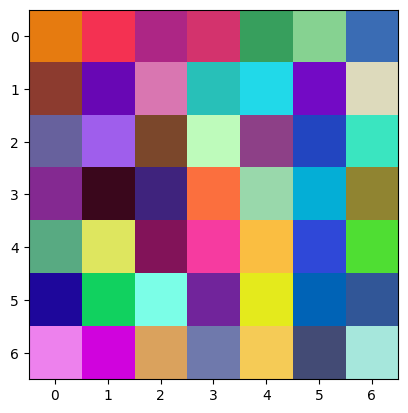

In [28]:
import torch
import matplotlib.pyplot as plt

# 1. Generate a random tensor [Channels, Height, Width]
# Values will be between 0 and 1
random_image_tensor = torch.rand(3, 7, 7)
print(random_image_tensor)
# 2. Matplotlib expects [Height, Width, Channels]
# We use .permute() to swap the axes around
vis_tensor = random_image_tensor.permute(1, 2, 0)

# 3. Display it
plt.imshow(vis_tensor)
plt.show()

In [20]:
random_image_tensor[0,0,1]

tensor(0.4102)

In [31]:
# [All Channels, Last Row, Last Column]
last_pixel = random_image_tensor[:, -1, -1]
print(last_pixel)

rgb= last_pixel*255
print(rgb)

tensor([0.6531, 0.9059, 0.8639])
tensor([166.5453, 231.0164, 220.2971])


#### Flattening
In deep learning, we often need to "flatten" high-dimensional data (like our 5D video tensor) into a 2D matrix. This is because standard Linear (Fully Connected) Layers usually expect a simple [Batch, Features] input.

To do this, we use .view() or .reshape().

Using .view()
Let's take our tensor t_5d with shape [2, 5, 3, 64, 64] and flatten everything except the Batch dimension.

In [ ]:
# The first dimension is our Batch (2)
# We want to squash the other 4 dimensions into one big "Feature" list
# Total features = 5 * 3 * 64 * 64 = 61,440

t_flat = t_5d.view(2, -1)

print(f"New Shape: {t_flat.shape}")
# Output: torch.Size([2, 61440])

**What does the -1 do?** The -1 is a PyTorch "superpower." It tells PyTorch: "I know the first dimension is 2, you do the math and figure out what the other number should be to make all the data fit."

**Why go back to 2D?**
Think of the 5D tensor as "Spatial/Temporal Data" (where things are in space and time) and the 2D tensor as "Features" (a list of characteristics).

| State | Shape | Purpose |
|---|---|---|
| 5D (Original) | [2, 5, 3, 64, 64] | Great for Convolutional Layers (detecting edges, motion, and color). |
| 2D (Flattened) | [2, 61440] | Great for Final Decision Layers (classifying if the video is "jumping" or "running"). |

#### Important Rules for Reshaping
1. Conservation of Elements: The total number of elements must stay the same. You can't turn a tensor of 6 elements into a shape that requires 10.

2. Memory Contiguity: .view() only works if the data is stored in a continuous block in memory. If it's not, PyTorch will tell you to use .reshape() or .contiguous() first.

* ```unsqueeze(dim)```: Adds a dimension of size 1 (e.g., [3, 2] $\rightarrow$ [1, 3, 2])
* ```squeeze()```: Removes all dimensions of size 1 (e.g., [1, 3, 2] $\rightarrow$ [3, 2]).
* ```view(shape)```: Changes the perspective of the data without changing the data itself.

## Update the repo

In [50]:
# 2. Push notebook changes to GitHub
# IMPORTANT: Press Ctrl+S (Save) before running this!
!git add .
!git commit -m "convert datatype"
!git push origin main

[main 1c35312] convert datatype
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Fundamentals_001.ipynb (68%)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 594 bytes | 118.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/barada02/DL_With_Pytorch.git
   632767e..1c35312  main -> main
